# Data-driven approaches to understanding dementia
## Application of single cell analysis to dementia research: practical
### Mark Fiers & Emma Davis

## Goals

* Understand a single cell data analysis workflow
* Practically run a basic single cell workflow
* Understand where things can go wrong (and how to catch problems)
* Pointers on where to continue your analysis

## Outline 

- Introduction
- Finding & loading data
- Preprocessing & QA
- Dimensionality reduction & clustering
- Differential expression, finding marker genes
- Continuing the analysis
- Closing remarks

## Trust, But verify.

*or - a reflection on data analysis & bioinformatics*

* Treat all operations as 'black box'.
* Understand and check input & output.
* Once you have a result, confirm using raw data.
   * For example, you have gene X upregulated in elder microglia - go back to the raw counts, and independently check it is the case.


## Experimental setup

* Sample selection
* Single cells or nuclei?
* Cell/nuclei Isolation protocol


## How to get help?

- Tutorials (eg, [Scanpy tutorials](https://scanpy-tutorials.readthedocs.io/en/latest/))
- Your friendly neighbourhood bioionformatician
- chatGPT & friends
- Google
- Read API documentation (describing the functions in a package (eg, [Scanpy API](https://scanpy.readthedocs.io/en/latest/api/index.html))
- Fiddle around

---

# Technicalities

## Conda / Mamba

We are running in a conda environment. Conda is a software package manager - allows you to maintain a consistent and reproducible software environment. Mamba is it's interchangeable, but faster sister. [Read more on the Mamba documentation page](https://mamba.readthedocs.io/)

### Recreate this conda/mamba environment

```
# or mamba install
conda install -c conda-forge scanpy python-igraph leidenalg \
    jupyterlab seaborn scikit-learn statsmodels colorcet \
    scipy matplotlib jupyterlab jupyter_contrib_nbextensions \
    pooch
```

## Jupyter

Jupyter is a digital notebook to organize code, documentation and visualizations. Jupyter allows you to:

- Organize a data analysis workflow
- Share your workflow (the `.ipynb` notebook) with others
- Document your code and results in one document (literate programming)
- Repeat an analysis

## Start our session

### First - go to your VM and open a terminal:

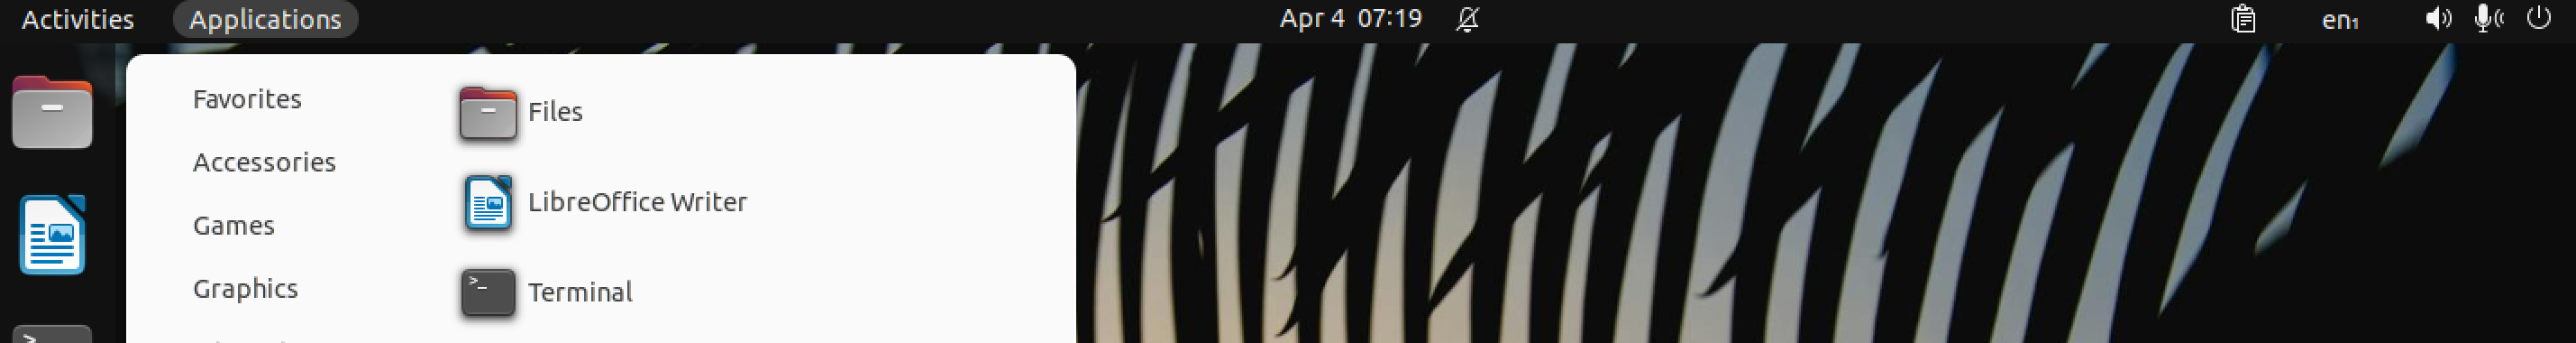

### Startup the environment

```
cd MF_SingleCell                 # Go to our work folder
./download_notebook.sh           # Download the ipython notebook
conda activate MF_SingleCell     # Start the conda environment
jupyter lab                      # Start jupyter lab
```

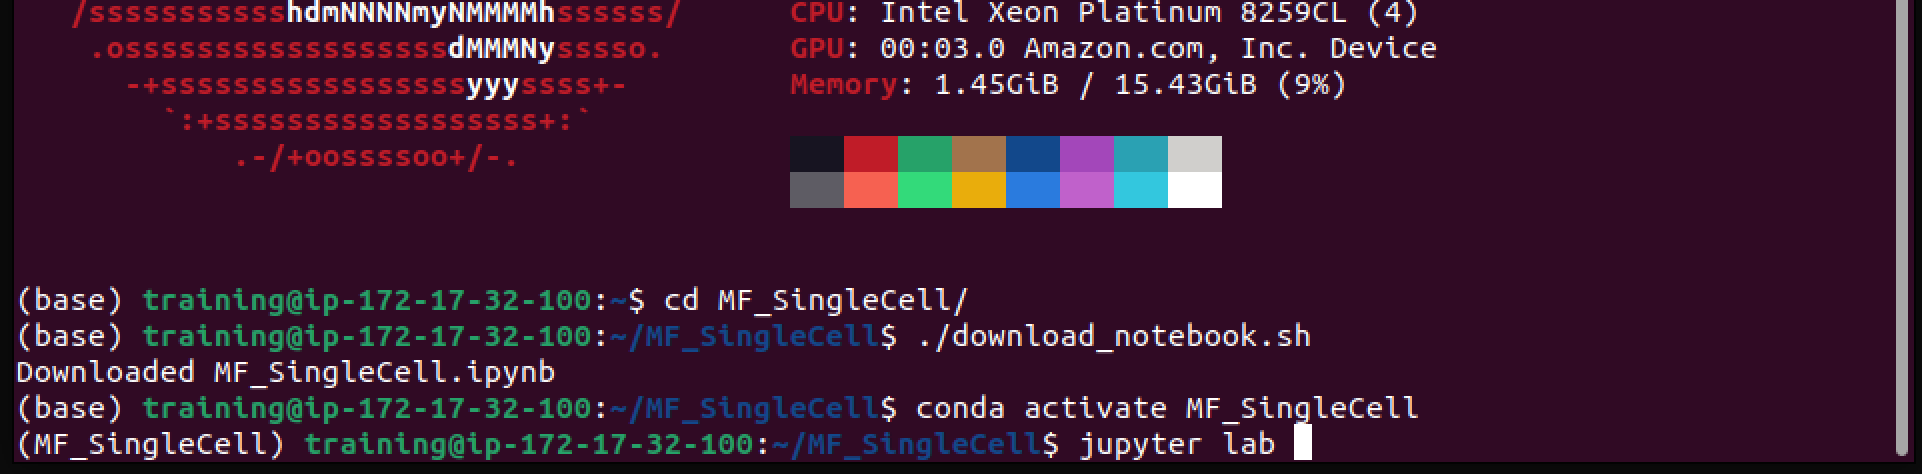

### Jupyter lab initial interface

*Maybe you need to click the `MF_SingleCell.ipynb` link on the left*

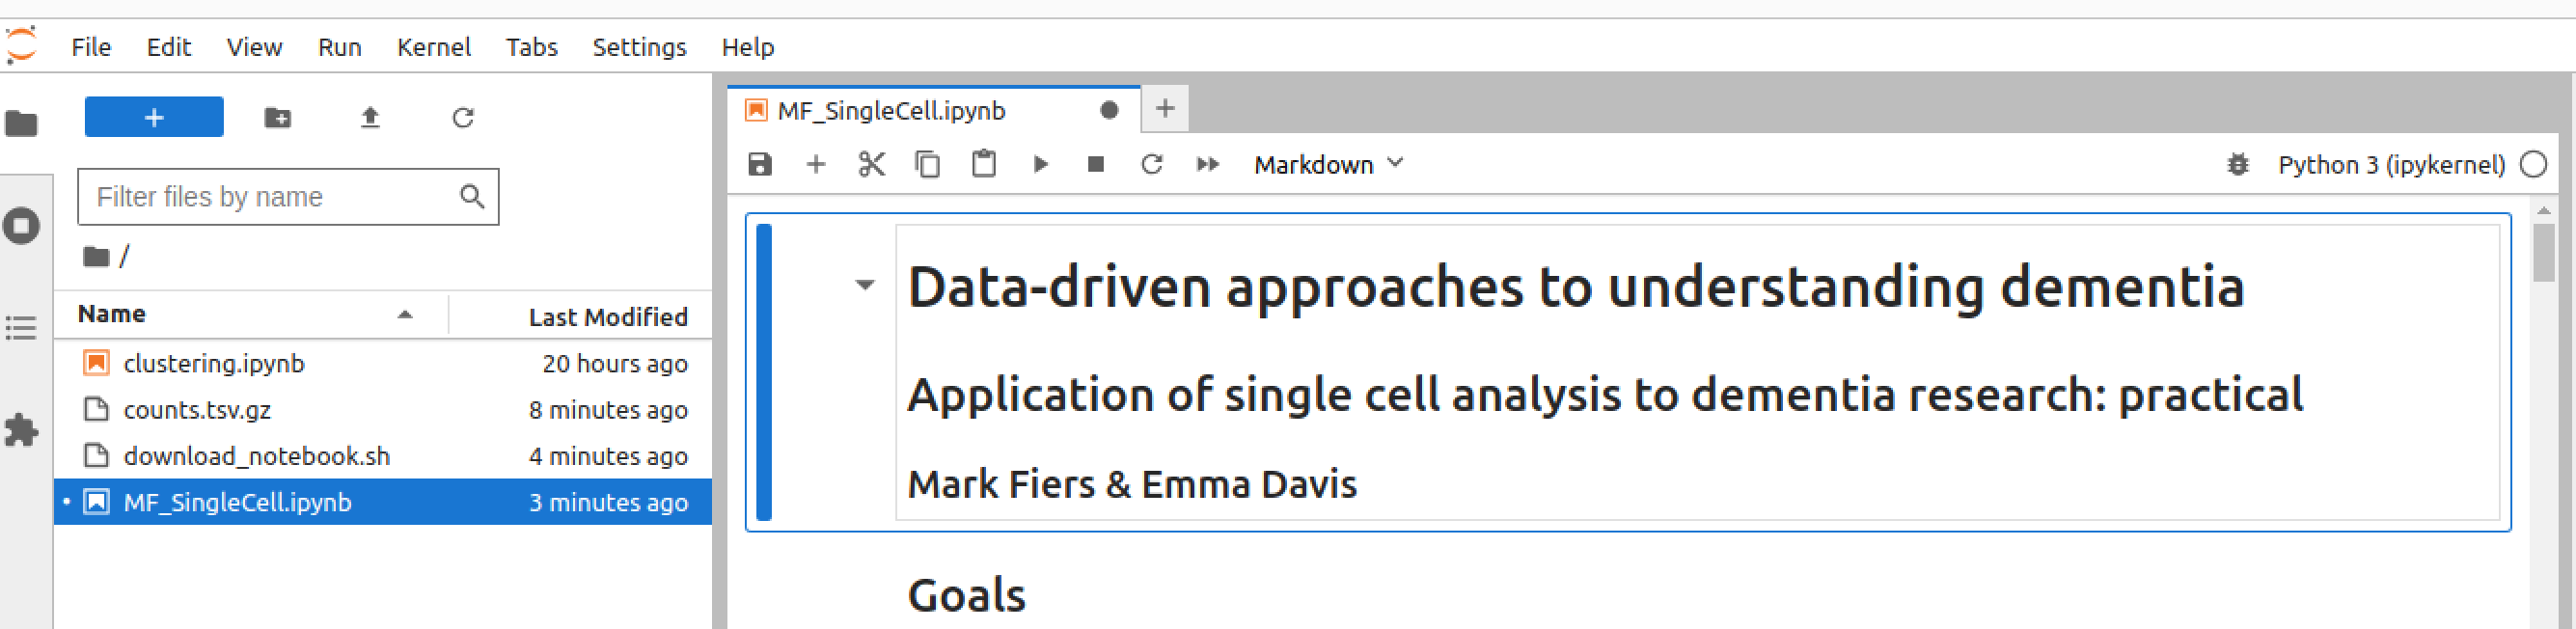

---

# Scanpy

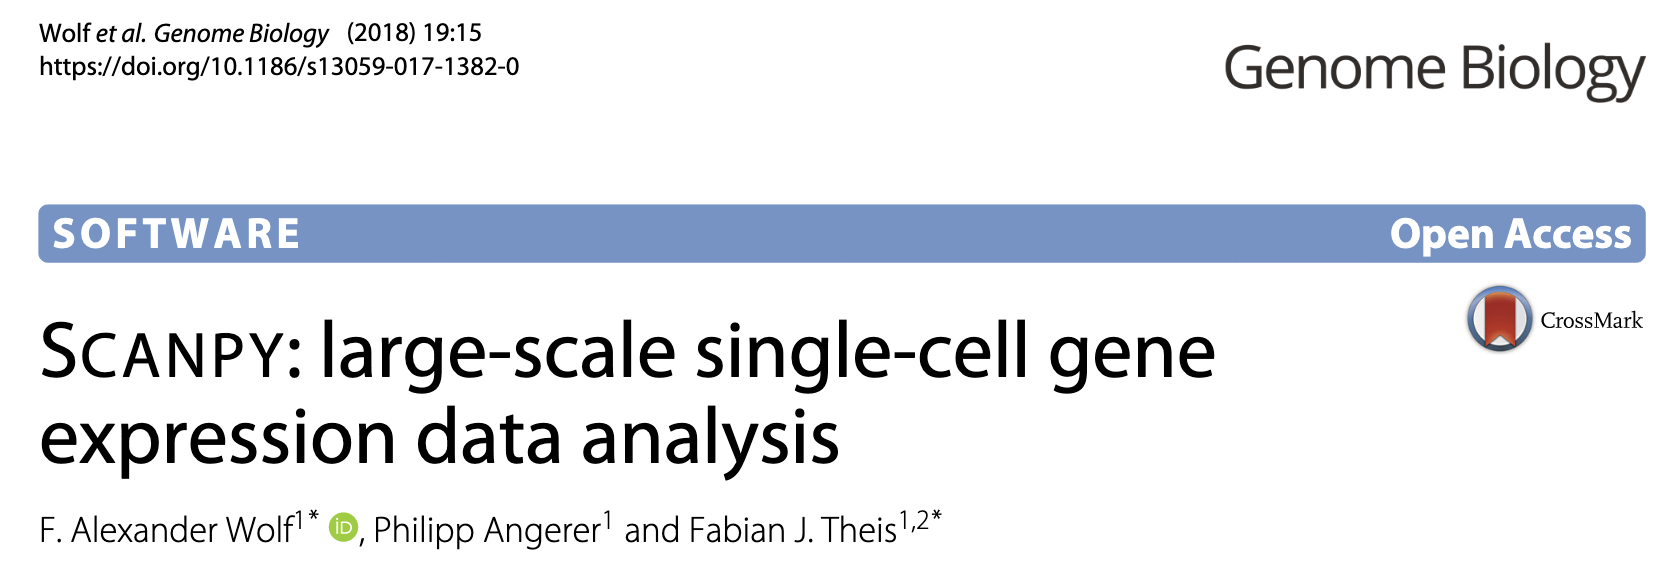

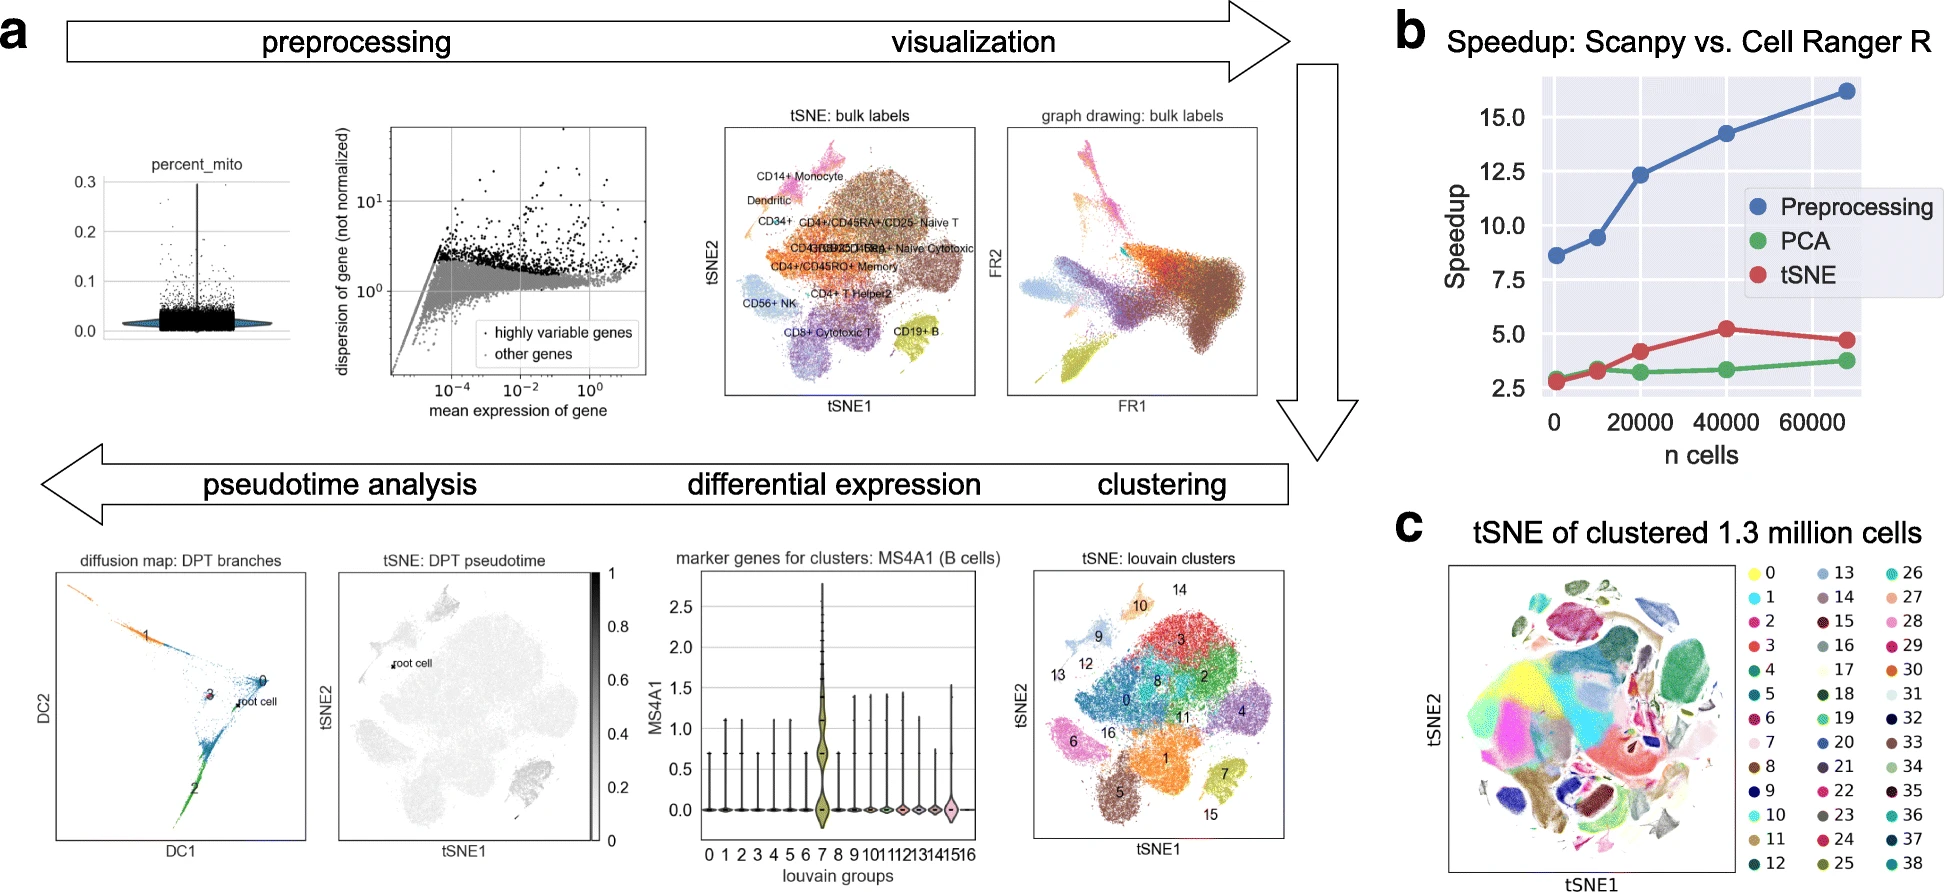

## Scanpy vs R/Seurat?

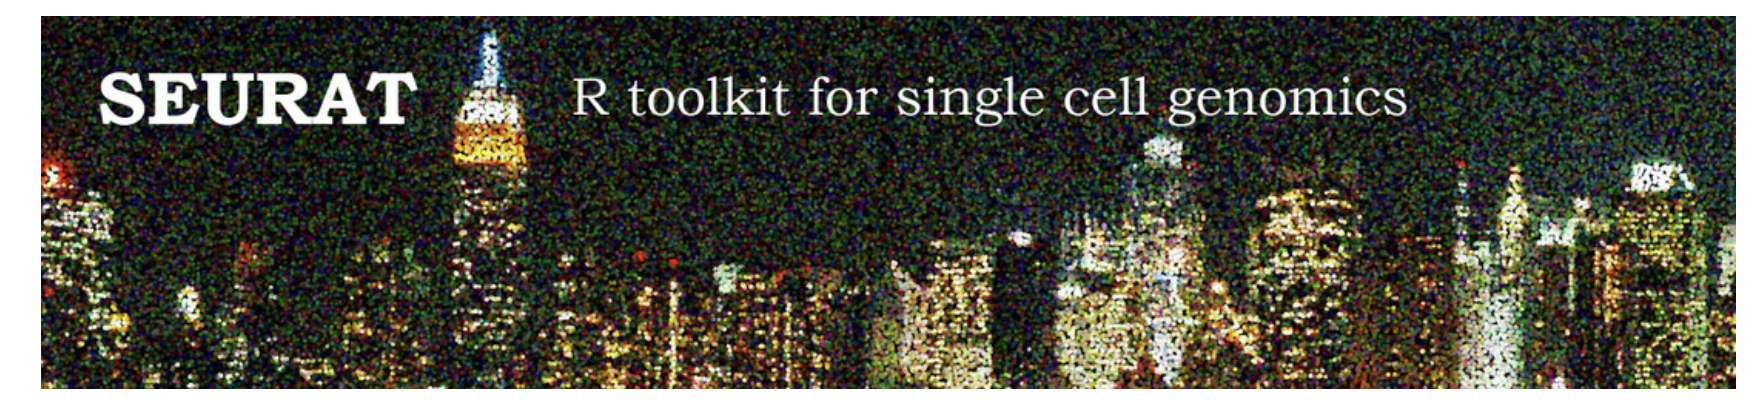

* Both very capable frameworks
* Python vs R & their ecosystems
* R/Seurat is better for advanced statistics, **differential expression** analysis

---

# Our data set
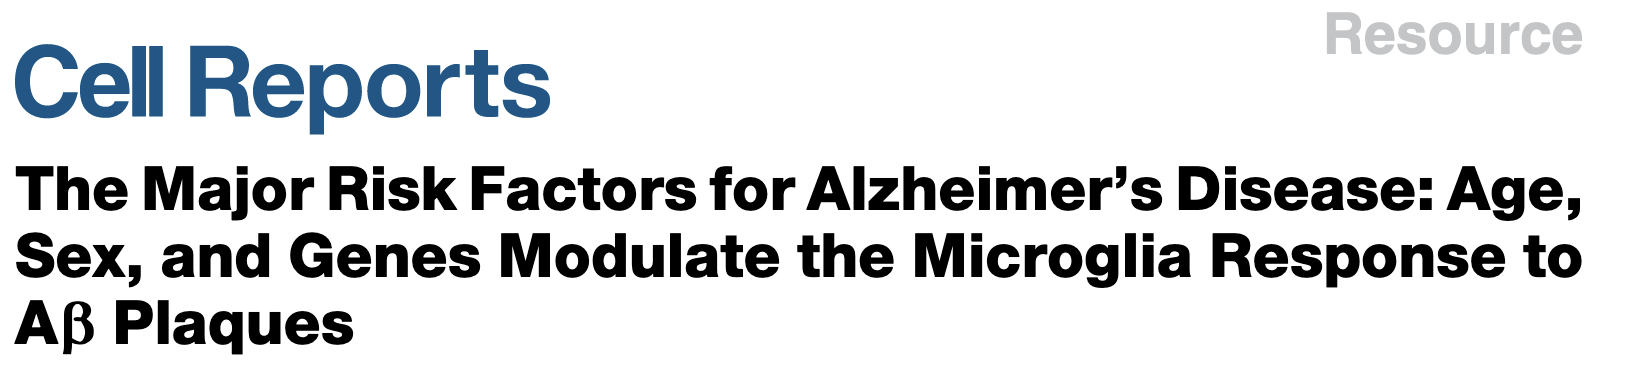


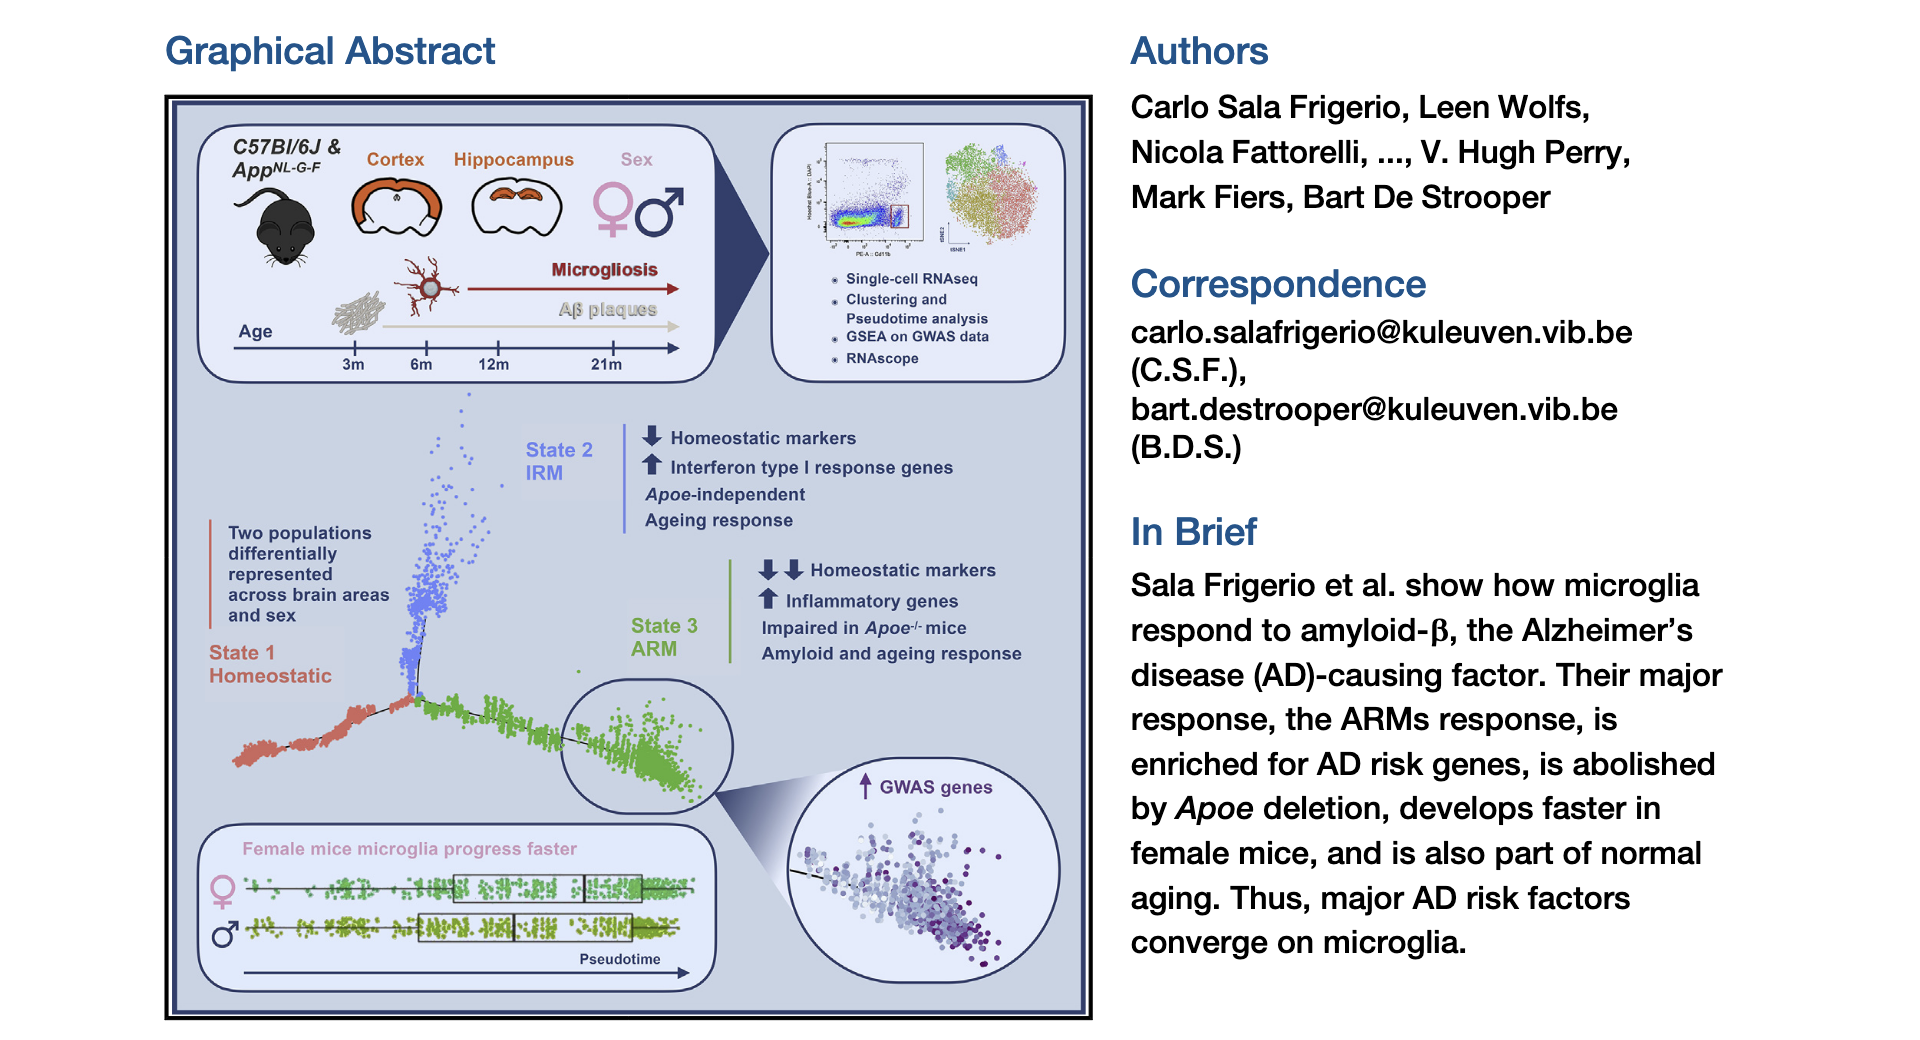

# Before we start

## Importing modules

In [14]:
import scanpy as sc
import pandas as pd
import seaborn as sns

---

---

# Finding & loading data

A **raw count** matrix & **cell metadata** table are provided as `counts.tsv.gz` and `metadata.tsv.gz`. There are gzipped (compressed) tab-separated text files.

## Metadata.

The experiment compares microglia from mice multiple ages (3, 6, 12 and 21 months); from male and female mice; from hippocampus and cortex; and from wild-type mice and APP-NLGF AD model mice. The metadata fields are encoded as:

| Field          |                  |                    |
|:---------------|:-----------------|:-------------------|
| **gender**     | **F**: Female    | **M**: Male        |
| **genotypep**  | **K**: APP-NLGF  | **W**: Wild type   |
| **tissue**     | **C**: Cortex    | **H**: Hippocampus |


## Actually load the data

In [206]:
# load raw counts using pandas' `read_csv` function
counts = pd.read_csv('counts.tsv.gz', sep="\t", index_col=0)
counts.shape

(10801, 29474)

In [193]:
# load metadata
metadata = pd.read_csv('metadata.tsv.gz', sep="\t", index_col=0)
metadata.shape

(10801, 6)

## Inspect your data!

Very important - never blindly rely on data being what you think it is

In [194]:
counts.iloc[:5,:5]

-343C11.2  00R_AC107638.2  0610005C13Rik  0610006L08Rik  \
K03FC.1A10          0               0              0              0   
K03FC.3A6           0               0              0              0   
K03FH.3B1           0               0              0              0   
K03FH.3E3           0               0              0              0   
K03FH.4A11          0               0              0              0   

            0610007P14Rik  
K03FC.1A10              0  
K03FC.3A6               0  
K03FH.3B1               0  
K03FH.3E3               0  
K03FH.4A11              0

This is an awful lot of zero's. A cell can be zero if a gene does not express in that cell - or - if for whatever reason the gene is not picked up. Single cell transcriptomics, compared to bulk transcriptomics has to work with very little RNA - and hence - it's sensitivity is much lower. In this dataset ~93% is zero, which is not abnormal and explains the large number of zero's in the snippet above (in bulk RNAseq I would expect that to be well below 50%)

Let's see some gene/cells that do express. First question - what is a highly expressing gene?

In [219]:
# note the power of pandas by chaining operations:
# first we sum per gene, then sort descendingly, and show the 'head'
counts.sum().sort_values(ascending=False).head()

Rn18s-rs5    269069792
Cst3         257752441
Hexb          92712398
Ctss          82061674
Cx3cr1        77511440
dtype: int64

And check the values of a few top genes
it pays off to have a few favourite genes, I'm adding "Apoe".

In [ ]:
counts[ ['Cst3', 'Hexb', 'Ctss', 'Apoe'] ].head()

Cst3  Hexb  Ctss  Apoe
K03FC.1A10  6630  2134  3327     1
K03FC.3A6   7155    74  1131     0
K03FH.3B1   4601  2459  2507     0
K03FH.3E3    853   589   552     0
K03FH.4A11  3944  1426  1701     0

Note, these are all integers - as you would expect dealing with raw counts.

In [205]:
metadata.head()

age gender genotype tissue  plate     lane
K03FC.1A10    3      F        K      C      1  mglia25
K03FC.3A6     3      F        K      C      3  mglia26
K03FH.3B1     3      F        K      H      3  mglia28
K03FH.3E3     3      F        K      H      3  mglia28
K03FH.4A11    3      F        K      H      4  mglia28

## <span style="color:crimson">🏃 Exercise</span>

---

# Preprocessing & QA

---

# Dimensionality reduction & clustering

---

# Differential expression, finding marker genes

---

# Continuing the analysis

---

# Closing remarks

---

# Appendix 1 - Visualize plots from the paper

In [7]:
# Load the data
import scanpy as sc
adata = sc.read_h5ad('./SalaFrigerio_finished.h5ad')

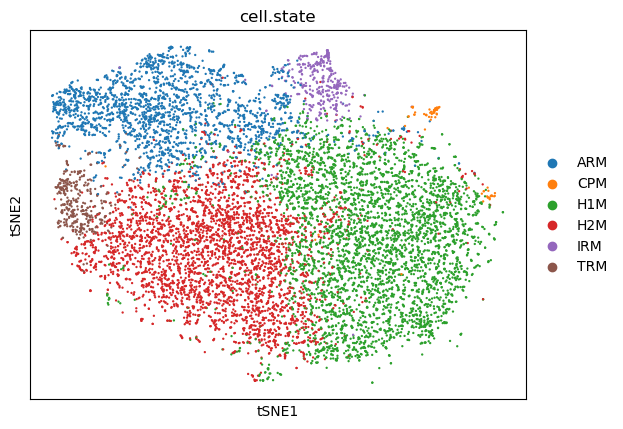

In [5]:
sc.pl.tsne(adata, color='cell.state')

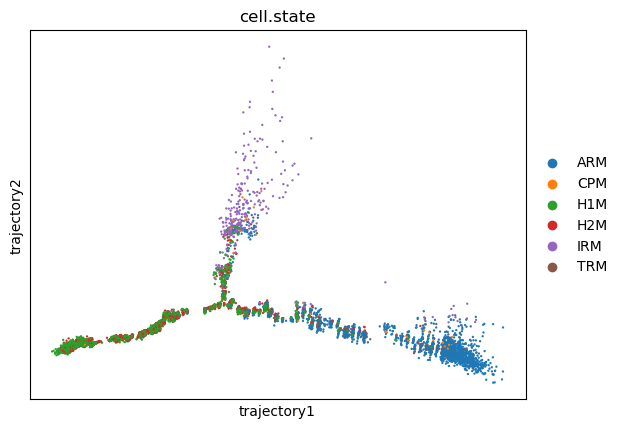

In [6]:
sc.pl.embedding(adata, basis='trajectory', color='cell.state')

---

# Appendix 2 - Background reading

## General

* [Jupyter lab documentation](https://jupyterlab.readthedocs.io/en/stable/)
* [Conda](https://docs.conda.io/en/latest/) & [Mamba](https://mamba.readthedocs.io/en/latest/) documentation
* [Scanpy documentation](https://scanpy.readthedocs.io/en/stable/), which is part of the [SCVerse](https://scverse.org/). A collection of tools around single cell (and spatial) analysis (in Python).
* [Seurat](https://satijalab.org/seurat/). The leading single cell framework in `R`

## Papers on single cell data analysis

* [Single-Cell Transcriptomics: Current Methods and Challenges in Data Acquisition and Analysis](https://www.frontiersin.org/journals/neuroscience/articles/10.3389/fnins.2021.591122/full)

## Where to find data?

There are many sources to get single cell data from.

- Generate yourself
- Papers
- GEO / SRA - see for example [the GEO page for our paper](https://www.ncbi.nlm.nih.gov/geo/query/acc.cgi?acc=GSE127893)
- [CelLXGene](https://cellxgene.cziscience.com/datasets)
- [Human Cell Atlas](https://data.humancellatlas.org/)
- [Allen Brain Map](https://portal.brain-map.org/)